## Foundations of Data Mining: Assignment 2

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [1]:
# Please fill in your names here
NAME_STUDENT_1 = "IRFANSYAH YUDHI TANASA"
NAME_STUDENT_2 = "ADRIAN ALEMAN"

In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all" 
# HTML('''<style>html, body{overflow: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

## Support Vector Bananas (4 points (2+2))
We will first explore SVM kernels and hyperparameters on an artificial dataset representing multiple banana shapes. 

In [1]:
import openml as oml
from sklearn.model_selection import *
bananas = oml.datasets.get_dataset(1460) # Download banana data
X, y = bananas.get_data(target=bananas.default_target_attribute);
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1/4)

1 . Evaluate how well an SVM classifier can fit the data. 

- Use a linear, polynomial and radial basis function (RBF) kernel, using their default hyperparameters. Evaluate the performance of each kernel using 10-fold cross-validation and AUC. Which one works best? 
- Visualize the results using the visualization code also used in class (under mglearn/plot_svm.py > plot_svm_kernels). Also show the AUC score and the number of support vectors. Explain intuitively how well the data is fitted, why the kernel is (not) able to fit the data, whether it is under- or overfitting, etc.

Using linear kernel, Mean 10-fold Cross-validation = 0.55
AUC score : 0.506 , number of support vectors : [1837 1776]
Using poly kernel, Mean 10-fold Cross-validation = 0.61
AUC score : 0.755 , number of support vectors : [1609 1609]
Using rbf kernel, Mean 10-fold Cross-validation = 0.90
AUC score : 0.970 , number of support vectors : [592 588]


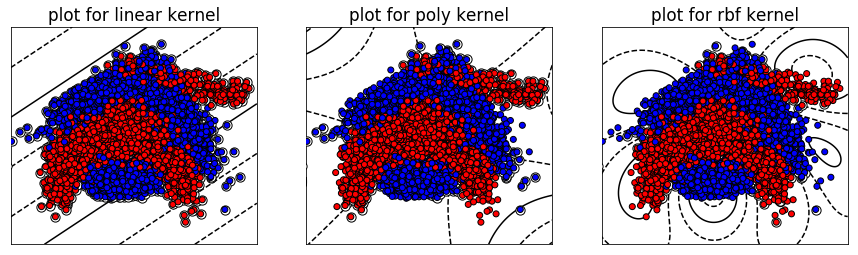

In [8]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np

# figure number
fignum = 1
#Create RBF Plot
plt.rcParams.update({'font.size': 14})
plt.subplots(1, 3, figsize=(15, 4))

# fit the model
for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel).fit(X_train, y_train)
    scores = cross_val_score(clf, X_test, y_test, cv=10)
    score_auc = roc_auc_score(y_test, clf.decision_function(X_test))

    # plot the line, the points, and the nearest vectors to the plane
    plt.subplot(1,3,fignum)
    _= plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                   s=85, edgecolors='k', c='w', zorder=10)
    _= plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                   zorder=10, cmap=plt.cm.bwr, edgecolors='k')

#     for i, coef in enumerate(clf.dual_coef_[0]):
#         plt.annotate("%0.2f" % (coef), (clf.support_vectors_[i, 0]+0.15,
#                                         clf.support_vectors_[i, 1]), fontsize=8, zorder=11)
    
    _= plt.axis('tight')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
#     _= plt.figure(fignum, figsize=(4, 3))
#     _= plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], 
#                    levels=[-.5, 0, .5])
    _= plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'])

    _= plt.xlim(x_min, x_max)
    _= plt.ylim(y_min, y_max)

    _= plt.xticks(())
    _= plt.yticks(())
    fignum = fignum + 1
    plt.title('plot for %s kernel' % kernel )
    print("Using",kernel,"kernel, Mean 10-fold Cross-validation = {:.2f}".format(scores.mean()))
    print("AUC score : {:.3f}".format(score_auc),", number of support vectors :",clf.n_support_)
plt.show()

**Q :** Which one works best?<br>**A :** Looking at the score from 10-fold Cross-validation and AUC for all three kernel, the best performance is achieved when using rbf as the kernel.<br>**Q :** Explain intuitively how well the data is fitted, why the kernel is (not) able to fit the data, whether it is under- or overfitting, etc.<br>**A :** Linear kernel is not feasible for not lineary separable data, clearly underfitting the data.  Polynomial performs a little better, but still is not good enough when using the default hyperparameters. The radial basis function (rbf) was the best since it makes use of the Kernel trick by adding another dimension and using it to separate the classes. Nonetheless, tuning its parameters might still be required to avoid an overfit of the data.

2 . Pick the RBF kernel and optimize the two most important hyperparameters (the $C$ parameter and the kernel width $\gamma$). 

- First, optimize manually using 3 values for each (a very small, default, and very large value). For each of the 9 combinations, create the same RBF plot as before, report the number of support vectors, and the AUC performance. Explain the performance results. When are you over/underfitting?
- Next, optimize the hyperparameters using a grid search and 10-fold cross validation. Show a heatmap of the results snd report the optimal hyperparameter values.
    - Hint: values for C and $\gamma$ are typically in [$2^{-15}..2^{15}$] on a log scale. Use at least 10 values for each.

/home/yudhi/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


With C = 3.0517578125e-05 and gamma = 3.0517578125e-05
AUC score: 0.533 and number of SV: [1776 1776]
With C = 3.0517578125e-05 and gamma = 1
AUC score: 0.924 and number of SV: [1776 1776]
With C = 3.0517578125e-05 and gamma = 32768
AUC score: 0.774 and number of SV: [1776 1776]
With C = 1 and gamma = 3.0517578125e-05
AUC score: 0.535 and number of SV: [1776 1776]
With C = 1 and gamma = 1
AUC score: 0.972 and number of SV: [517 519]
With C = 1 and gamma = 32768
AUC score: 0.820 and number of SV: [2195 1776]
With C = 32768 and gamma = 3.0517578125e-05
AUC score: 0.564 and number of SV: [1777 1776]
With C = 32768 and gamma = 1
AUC score: 0.968 and number of SV: [441 422]
With C = 32768 and gamma = 32768
AUC score: 0.822 and number of SV: [2194 1775]


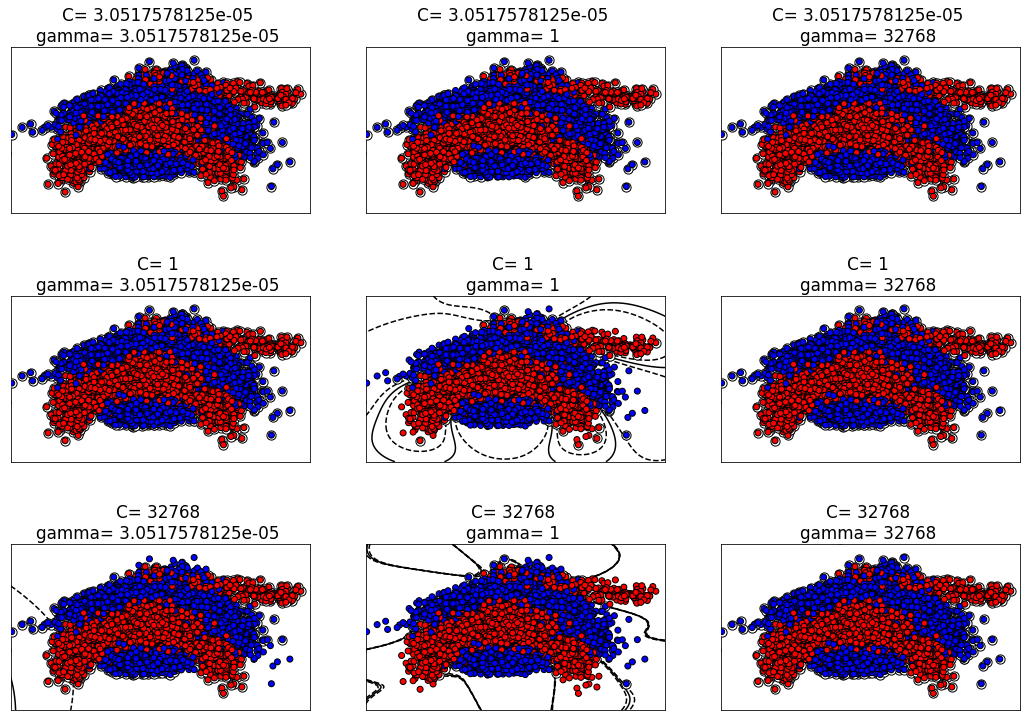

In [9]:
import openml as oml
from sklearn.model_selection import *
bananas = oml.datasets.get_dataset(1460) # Download banana data
X, y = bananas.get_data(target=bananas.default_target_attribute);
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1/4)
# first, optimize manually using 3 values for each (a very small, default, and very large value).
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np

# figure number
fignum = 1
#Create RBF Plot
plt.rcParams.update({'font.size': 14})
fig = plt.subplots(3, 3, figsize=(15, 10))
plt.tight_layout(h_pad=4.0)

# fit the model
for c in (2 ** -15, 1, 2 ** 15):
    for g in (2 ** -15, 1, 2 ** 15):
        clf_rbf = svm.SVC(C=c, gamma=g).fit(X_train, y_train)
        # show the AUC score and the number of support vectors
        score_auc = roc_auc_score(y_test, clf_rbf.decision_function(X_test))
        # plot the line, the points, and the nearest vectors to the plane
        plt.subplot(3,3,fignum)
#         plt.clf_rbf()

#         plt.scatter(clf_rbf.support_vectors_[:, 0], clf_rbf.support_vectors_[:, 1], s=80,
#                 facecolors='none', zorder=10, edgecolors='k')
#         plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, zorder=10, cmap=plt.cm.bwr,
#                 edgecolors='k')
        
        plt.scatter(clf_rbf.support_vectors_[:, 0], clf_rbf.support_vectors_[:, 1],
                       s=85, edgecolors='k', c='w', zorder=10)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, zorder=10,
                       cmap=plt.cm.bwr, edgecolors='k')
        
        plt.axis('tight')
        x_min = -3
        x_max = 3
        y_min = -3
        y_max = 3

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf_rbf.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
#         plt.figure(fignum, figsize=(4, 3))
#         plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.bwr)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],levels=[-.5, 0, .5])

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)

        plt.xticks(())
        plt.yticks(())
        fignum = fignum + 1
        plt.title('C= %s \ngamma= %s ' % (c, g))
        print("With C =",c,"and gamma =",g)
        print("AUC score: {:.3f}".format(score_auc),"and number of SV:",clf_rbf.n_support_)
plt.show()

**Q :** Explain the performance results. When are you over/underfitting?<br>**A:** High value of gamma, will result in higher number of support vectors and will result in overfitting, and the contrary leads to underfitting. Higher value of C lead to underfitting, and lower values lead to overfitting.
We observe that when C=32768 the stripe lines are clearly underfitting the data. Overfitting should occur when C=3e-05 and gamma= 32768, although it was not clearly viewed on the plots.  

Perform Grid Search ....
AUC score: 0.971
Best parameters: {'C': 322.53978877308805, 'gamma': 0.3149802624737184}
Best cross-validation score: 0.969



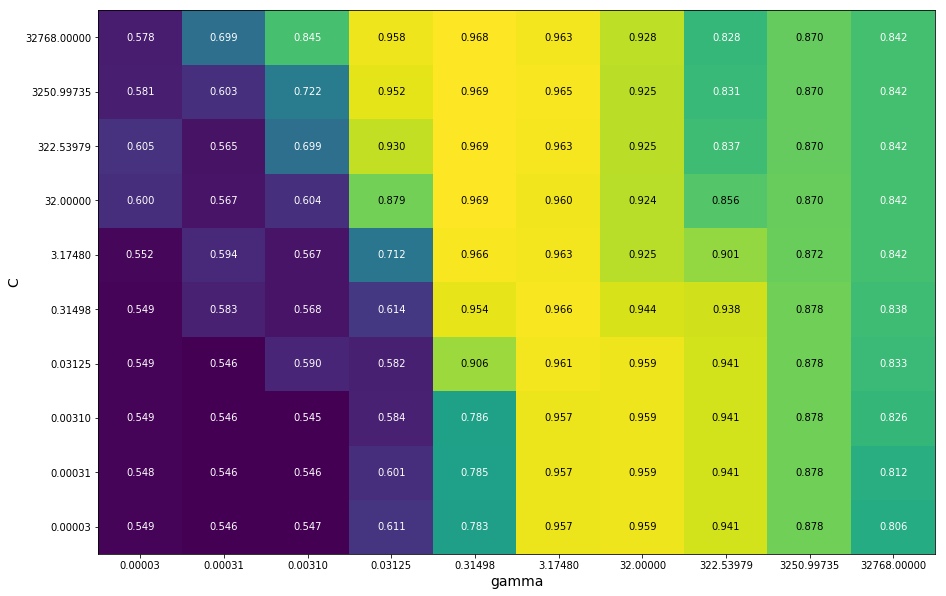

In [8]:
# Optimize the hyperparameters using a grid search and 10-fold cross validation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import roc_auc_score
from matplotlib.ticker import FormatStrFormatter, FuncFormatter

#Set Grid Parameter
CGgrid = np.logspace(-15,15,num=10,base=2)
param_grid = {'C': CGgrid ,
              'gamma': CGgrid}

xtick = []
ytick = []
for i in CGgrid:
    xtick.append('{0:.5f}'.format(i))
    ytick.append('{0:.5f}'.format(i))

#Do Grid Search
print("Perform Grid Search ....")
grid_search = GridSearchCV(SVC(), param_grid, cv=10, scoring='roc_auc',
                           return_train_score=True, n_jobs=-1)
grid_search.fit(X, y)
print("AUC score: {:.3f}".format(grid_search.score(X, y)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))
print("")

# convert to Dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Show the first 5 rows
# display(results.head())
scores = np.array(results.mean_test_score).reshape(len(param_grid['C']), len(param_grid['gamma']))

#Modify Heatmap function from mglearn>tools.py
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.3f"):
    plt.figure(figsize=(15,10))
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=None, vmax=None)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels, fontsize = 10)
    ax.set_yticklabels(yticklabels, fontsize = 10)
    ax.set_aspect('auto')
    
    
    for p, color, value in zip(img.get_paths(), img.get_facecolors(), img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center", fontsize=10)
    return img


heatmap(scores, xlabel='gamma', xticklabels=xtick,
                     ylabel='C', yticklabels=ytick, cmap="viridis");
plt.show()

**Q :** Show a heatmap of the results snd report the optimal hyperparameter values<br>**A:** The heatmap and optimal parameter is shown above

## Building Kernels (4 points (0.5+0.5+1+2))

Consider the artificial dataset given below. It represents a sine wave with added noise.

1. Fit an SVM Regressor with the default RBF kernel, and plot the predictions on all data points in [0, 40]. 

    - Does it fit the data well? Does it extrapolate well (in the range [30,40])? Explain your findings. 
    - Can you get better results by tweaking the kernel or the other SVM parameters?
    
2. Implement your own linear kernel. This is a function that takes 2 vectors (arrays) and returns the dot product:

      $$k(\mathbf{x}_i,\,\mathbf{x}_j) = \mathbf{x}_i \cdot \mathbf{x}_j$$
    - Build an SVM regressor using that kernel by passing your kernel function as the `kernel` hyperparameter. 
    - Fit it on the sine data and plot the predictions on all data points. Interpret the results.
    
3. Since this data is periodic, it makes sense to implement a periodic kernel instead. 

    - This is the Exponential Sine Squared kernel, with length scale $\Gamma$ and periodicity $P$:
  $$k(\mathbf{x}_i,\,\mathbf{x}_j) = \exp \left( -\Gamma\,\sin^2\left[\frac{\pi}{P}\,\left|\left|x_i-x_j\right|\right|\right]\right)$$
    - Implement it, using the defaults $\Gamma=1$, periodicity $P=1$, and Euclidean distance.
    - Train an SVM regressor with it, fit in on the same data and plot the result. Interpret the outcome. 
    - Think about what $\Gamma$ and $P$ represent. Can you improve the fit by manually adjusting them? Explain your findings.
    - Optimize $\Gamma$ and periodicity $P$ (using `true_y` as the ground truth). Use a grid search or random search, $\Gamma \in [0,1]$, $P \in [1,100]$, try at least 5 values for each.

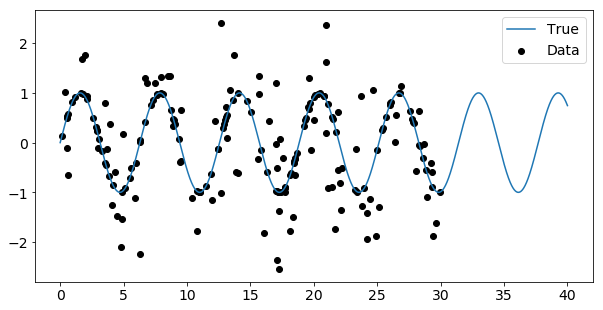

In [86]:
# Generate sample data
rng = np.random.RandomState(0) # Random seed, for reproducibility 
X = 30 * rng.rand(200, 1)
y = np.sin(X).ravel() 
y[::2] += rng.normal(scale = 1.0, size = X.shape[0] // 2) # adds noise

X_plot = np.linspace(0, 40, 10000)[:, None] # A larger range to evaluate on
true_y = np.sin(X_plot) # and the 'true' target function

plt.figure(figsize=(10, 5))
plt.scatter(X, y, c='k', label='Data')
plt.plot(X_plot, true_y, label='True');
plt.legend(loc='best')
plt.show()

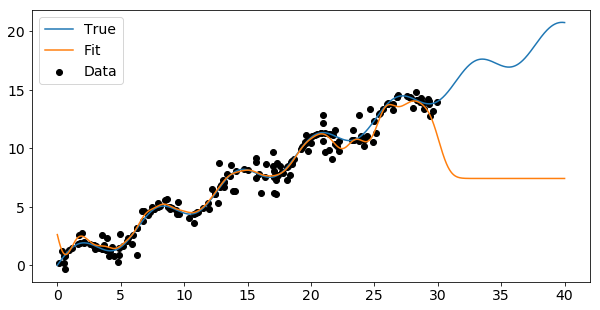

In [82]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np

plt.figure(figsize=(10, 5))
plt.scatter(X, y, c='k', label='Data')
plt.plot(X_plot, true_y, label='True');

clf = svm.SVR(kernel='rbf').fit(X, y)
#scores = cross_val_score(clf, X_plot, true_y, cv=10)
#score_auc = roc_auc_score(true_y, clf.decision_function(X_plot))
y_svr=clf.predict(X_plot)
plt.plot(X_plot, y_svr, label='Fit');
plt.legend(loc='best')
plt.show()

**Q :** Explain your findings<br>**A:** The data looks decently fitted, however the model does not extrapolate well on the range [30 40]. This is because SVM is predictive model and does not actually works figuring out the true equation that models the data. 

In [51]:
from sklearn.svm import SVR
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e-1,1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})
svr.fit(X, y)
svr.best_params_

{'C': 1.0, 'gamma': 0.1}

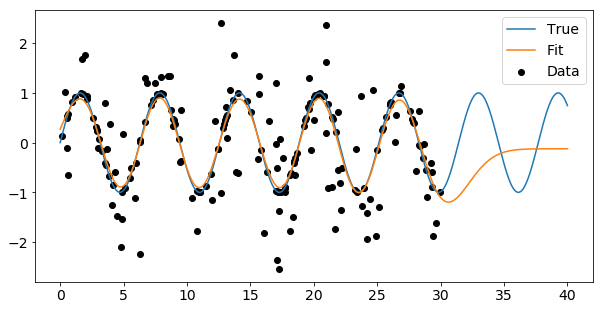

In [87]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, c='k', label='Data')
plt.plot(X_plot, true_y, label='True');

clf = svm.SVR(kernel='rbf',C=1, gamma=0.1).fit(X, y)
#scores = cross_val_score(clf, X_plot, true_y, cv=10)
#score_auc = roc_auc_score(true_y, clf.decision_function(X_plot))
y_svr=clf.predict(X_plot)
plt.plot(X_plot, y_svr, label='Fit');
plt.legend(loc='best')
plt.show()

**Q :** Can you get better results by tweaking the kernel or the other SVM parameters?<br>**A :** The prediction slighly improved after tuning the hyperparameters, although the model is still not good for extrapolation in the [30-40] range.

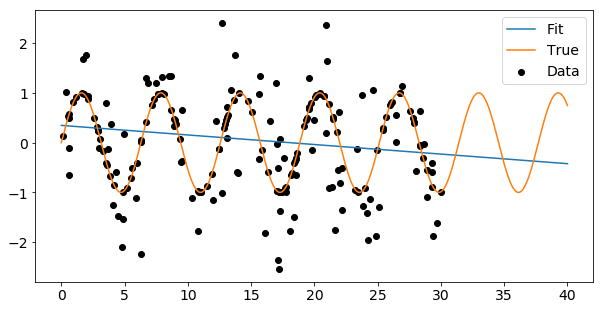

In [88]:
# implement our own kernel
clf = svm.SVR(kernel='precomputed')

kernel_train = np.dot(X, X.T)  # linear kernel
clf.fit(kernel_train, y)

kernel_test = np.dot(X_plot, X.T)
y_svr = clf.predict(kernel_test)

plt.figure(figsize=(10, 5))

plt.plot(X_plot, y_svr, label='Fit');
plt.scatter(X, y, c='k', label='Data')
plt.plot(X_plot, true_y, label='True');
plt.legend(loc='best')
plt.show()

**Q :** Implement your own kernel and interpret the results.<br>**A :** This custom kernel gives the same result as using a linear kernel. In other words the linear kernel is the result of the dot product of the data, which can be interpreted as the projection of the data. 

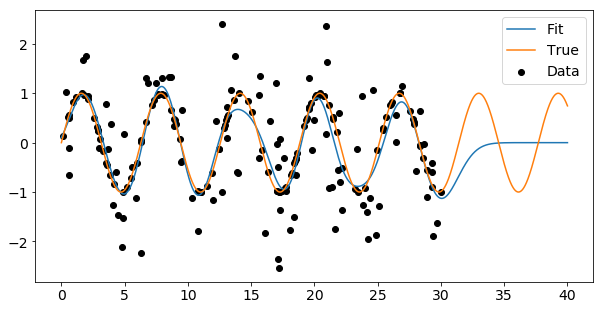

In [89]:
##Squared
from sklearn.gaussian_process.kernels import WhiteKernel,ExpSineSquared
from sklearn.gaussian_process import GaussianProcessRegressor
clf = svm.SVR(kernel='precomputed')

gp_kernel = ExpSineSquared(1.0, 1.0)\
            + WhiteKernel(1e-1)
gpr = GaussianProcessRegressor(kernel=gp_kernel)
gpr.fit(X, y)
y_gpr = gpr.predict(X_plot, return_std=False)

y_gpr, y_std = gpr.predict(X_plot, return_std=True)



plt.figure(figsize=(10, 5))

plt.plot(X_plot, y_gpr, label='Fit');
plt.scatter(X, y, c='k', label='Data')
plt.plot(X_plot, true_y, label='True');
plt.legend(loc='best')
plt.show()

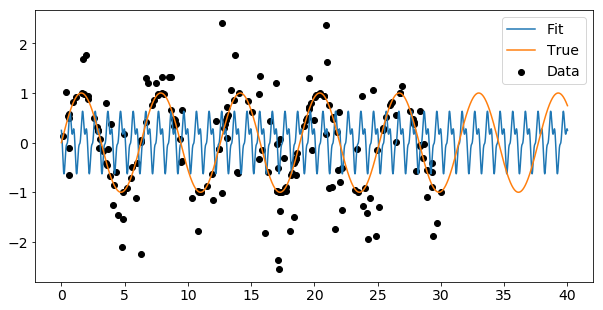

In [90]:
##Squared
from sklearn.gaussian_process.kernels import WhiteKernel,ExpSineSquared
from sklearn.gaussian_process import GaussianProcessRegressor
clf = svm.SVR(kernel='precomputed')

gp_kernel = ExpSineSquared(1.0, 1.0)
            
    
gpr = svm.SVR(kernel=gp_kernel)
gpr.fit(X, y)
y_gpr = gpr.predict(X_plot)


plt.figure(figsize=(10, 5))

plt.plot(X_plot, y_gpr, label='Fit');
plt.scatter(X, y, c='k', label='Data')
plt.plot(X_plot, true_y, label='True');
plt.legend(loc='best')
plt.show()

**Q :** Does it extrapolate well (in the range [30,40])?<br>**A :** We observe that the regressor is able to predict a periodic signal with also extrapolates on the [30-40] eange. However, the sinusoidal is distorted and the periodicity does not correspond to the original one, which means that the hyperparameters need to be tuned.

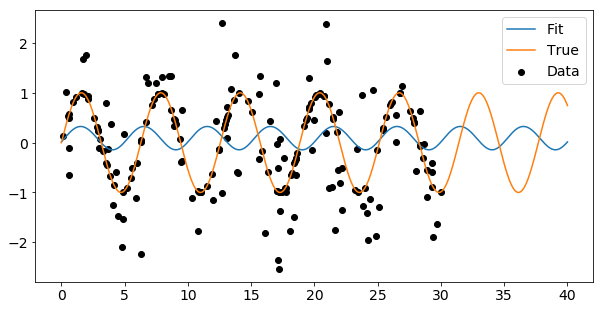

In [91]:
##Squared
from sklearn.gaussian_process.kernels import WhiteKernel,ExpSineSquared
from sklearn.gaussian_process import GaussianProcessRegressor
clf = svm.SVR(kernel='precomputed')

gp_kernel = ExpSineSquared(5.0, 5.0)
            
    
gpr = svm.SVR(kernel=gp_kernel)
gpr.fit(X, y)
y_gpr = gpr.predict(X_plot)


plt.figure(figsize=(10, 5))

plt.plot(X_plot, y_gpr, label='Fit');
plt.scatter(X, y, c='k', label='Data')
plt.plot(X_plot, true_y, label='True');
plt.legend(loc='best')
plt.show()

**Comment :** We tried setting the periodicity to 5, given that is the period of the original signal. When doing this, the signal was distorted. We also tried setting the scale to 5, which gave a good waveform but delayed with respect to the original. 

In [57]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR

clf = svm.SVR(kernel='precomputed')

param_grid = {"kernel": [ExpSineSquared(l, p)
                         for l in np.linspace(0.1, 1, 5)
                         for p in np.linspace(1, 100, 5)]}

svr = GridSearchCV(clf, cv=5,param_grid=param_grid)

svr.fit(X, y)
svr.best_params_

{'kernel': ExpSineSquared(length_scale=0.1, periodicity=100)}

In [58]:
for l in [0.1, 0.25, 0.5, 0.75,1]:
    for p in [1,25,50,75,100]:
        # for each combination of parameters
        # train an SVC
        #svm = SVC(gamma=gamma, C=C)
        gp_kernel = ExpSineSquared(l, p)

        gpr = svm.SVR(kernel=gp_kernel)
        gpr.fit(X, y)
        y_gpr = gpr.predict(X_plot)

        # perform cross-validation
        #scores = cross_val_score(gpr, X_plot, true_y, cv=3)
        scores = cross_val_score(gpr, X_plot, true_y, cv=3)

        # compute mean cross-validation accuracy
        score = np.mean(scores)
        print('For L=%f and P=%f ' % (l,p) )
        print(score)
        print()

/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For L=0.100000 and P=1.000000 
-0.013031310020158005



/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For L=0.100000 and P=25.000000 
0.7197595632540915



/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For L=0.100000 and P=50.000000 
0.08697629421558577



/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For L=0.100000 and P=75.000000 
0.047295076121172154



/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For L=0.100000 and P=100.000000 
-0.036809512896920284



/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For L=0.250000 and P=1.000000 
-0.014559097050798867



/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For L=0.250000 and P=25.000000 
0.7344369043584557



/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For L=0.250000 and P=50.000000 
-0.19257556450748456



/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For L=0.250000 and P=75.000000 
-1.2790387349000643



/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For L=0.250000 and P=100.000000 
-20.84904676907426



/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For L=0.500000 and P=1.000000 
-0.015513344938215582



/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For L=0.500000 and P=25.000000 
0.7404107850029608



/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For L=0.500000 and P=50.000000 
-11.505380042953009



/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For L=0.500000 and P=75.000000 
-79.3892919766606



/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For L=0.500000 and P=100.000000 
-55.36929136976233



/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For L=0.750000 and P=1.000000 
-0.015503435875050839



/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For L=0.750000 and P=25.000000 
0.1505262058723367



/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For L=0.750000 and P=50.000000 
-70.94254328602317



/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For L=0.750000 and P=75.000000 
-46.82520030887671



/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For L=0.750000 and P=100.000000 
-24.619113971371082



/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For L=1.000000 and P=1.000000 
-0.01514942873257922



/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For L=1.000000 and P=25.000000 
-2.128454796599152



/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For L=1.000000 and P=50.000000 
-58.86044078452926



/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For L=1.000000 and P=75.000000 
-25.38565540248481



/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yudhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For L=1.000000 and P=100.000000 
-15.304668684408298



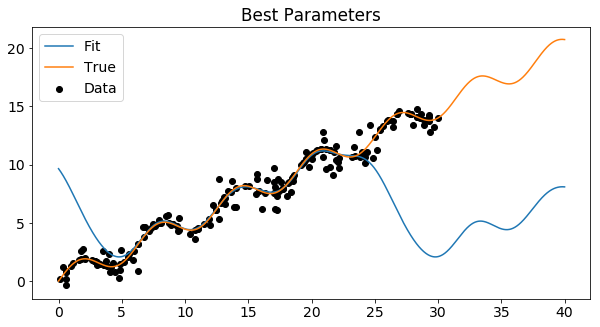

In [79]:
##Squared
from sklearn.gaussian_process.kernels import WhiteKernel,ExpSineSquared
from sklearn.gaussian_process import GaussianProcessRegressor
clf = svm.SVR(kernel='precomputed')

#gp_kernel = ExpSineSquared(0.1, 100)
#gp_kernel = ExpSineSquared(0.325, 25.75)            
gp_kernel = ExpSineSquared(0.5, 25)            


gpr = svm.SVR(kernel=gp_kernel)
gpr.fit(X, y)
y_gpr = gpr.predict(X_plot)


plt.figure(figsize=(10, 5))

plt.plot(X_plot, y_gpr, label='Fit');
plt.scatter(X, y, c='k', label='Data')
plt.plot(X_plot, true_y, label='True');
plt.title('Best Parameters');
plt.legend(loc='best')
plt.show()

4 . We now make the problem a bit more challenging by adding an upward trend:

- Fit the same SVM using the optimal parameters from the previous subtask and plot the results. Do they still work? Explain what you see.
- Fit a Gaussian process (GP) using the kernels given below. First use the singular ExpSineSquared kernel (the implementation provided by sklearn this time), then build a new kernel consisting of the 3 components given below. Use both to predict all points for the "rising noisy sine" data and plot the results as usual. Interpret the results.
    - For the GP, it may help to use `normalize_y=True` since the y-values are not around 0. Setting `alpha=0.1` may help with possible numerical issues, otherwise keep it at 0.
- Also plot the _uncertainty interval_ around the predictions. You can ask the GP to return the standard deviation during prediction with the `return_std=True` hyperparameter. Plot a band 2 standard deviations above and below the prediction. You can use MatPlotLib's `fill_between` as shown in class.
    - You can combine the 3 models in one plot for easy comparison.
- We've provided reasonable values for the kernel hyperparameters above. Can you optimize them further to get an even better fit? Think about what the hyperparameters do and optimize the ones you think are most worth tuning.

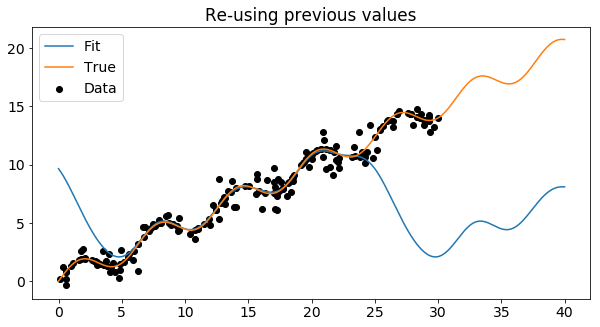

In [62]:
# Generate sample data with added trend
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

rng = np.random.RandomState(0)
X = 30 * rng.rand(200, 1)
y = X.ravel()/2 + np.sin(X).ravel()
y[::2] += rng.normal(scale = 1.0, size = X.shape[0] // 2)  # add noise

X_plot = np.linspace(0, 40, 10000)[:, None]
true_y = X_plot/2 + np.sin(X_plot)

from sklearn.gaussian_process.kernels import WhiteKernel,ExpSineSquared
from sklearn.gaussian_process import GaussianProcessRegressor
clf = svm.SVR(kernel='precomputed')

gp_kernel = ExpSineSquared(0.5, 25)            

gpr = svm.SVR(kernel=gp_kernel)
gpr.fit(X, y)
y_gpr = gpr.predict(X_plot)

plt.figure(figsize=(10, 5))
plt.plot(X_plot, y_gpr, label='Fit');
plt.scatter(X, y, c='k', label='Data')
plt.plot(X_plot, true_y, label='True');
#plt.fill_between(X_plot[:, 0], y_gpr - y_std, y_gpr + y_std, color='darkorange',
#                 alpha=0.2)
plt.title('Re-using previous values');
plt.legend(loc='best')
plt.show()

**Q :** Fit the same SVM using the optimal parameters from the previous subtask and plot the results. Do they still work? Explain what you see.<br>**A :** The previous model only fits correctly a region of the new data, but gives bad results for in the extreme ranges of [0-7] and [25-40]

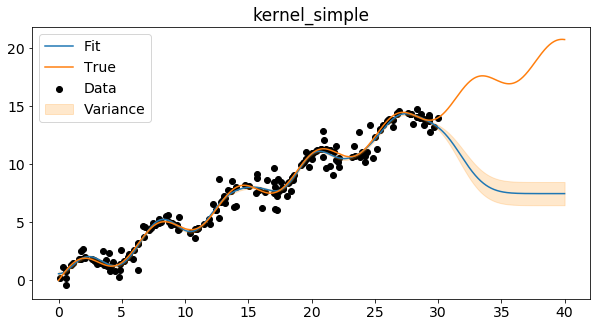

In [65]:
## Given functions
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared, RBF

# Replace `length_scale` and `periodicity` with the values found in the previous part.
kernel_simple = ExpSineSquared(length_scale=0.5, periodicity=25) # periodic component

k1 = 4300 * RBF(length_scale=70.0)  # long term smooth rising trend
k2 = 6 * RBF(length_scale=90.0) * ExpSineSquared(length_scale=1.3, periodicity=1.0)  # periodic component
k3 = 0.03 * RBF(length_scale=0.134) + WhiteKernel(noise_level=0.035)  # noise terms

gpr = GaussianProcessRegressor(kernel=kernel_simple,normalize_y=True,alpha=1e-1)
gpr.fit(X, y)
y_gpr, y_std = gpr.predict(X_plot, return_std=True)


plt.figure(figsize=(10, 5));
plt.plot(X_plot, y_gpr, label='Fit');
plt.scatter(X, y, c='k', label='Data');
plt.plot(X_plot, true_y, label='True');
plt.fill_between(X_plot[:, 0], y_gpr - y_std, y_gpr + y_std, color='darkorange',
                 alpha=0.2, label='Variance')
plt.title('kernel_simple');
plt.legend(loc='best')
plt.show()

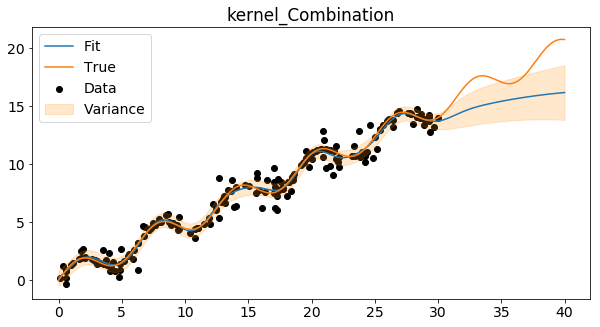

In [67]:

## Given functions
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared, RBF

# Replace `length_scale` and `periodicity` with the values found in the previous part.
kernel_simple = ExpSineSquared(length_scale=0.5, periodicity=25) # periodic component

k1 = 4300 * RBF(length_scale=70.0)  # long term smooth rising trend
k2 = 6 * RBF(length_scale=90.0) * ExpSineSquared(length_scale=1.3, periodicity=1.0)  # periodic component
k2 = 6 * RBF(length_scale=90.0) * ExpSineSquared(length_scale=0.5, periodicity=25)  # periodic component

k3 = 0.03 * RBF(length_scale=0.134) + WhiteKernel(noise_level=0.035)  # noise terms

k4=k1+k2+k3;

gpr = GaussianProcessRegressor(kernel=k4,normalize_y=True,alpha=1e-1)
gpr.fit(X, y)
y_gpr, y_std = gpr.predict(X_plot, return_std=True)


plt.figure(figsize=(10, 5));
plt.plot(X_plot, y_gpr, label='Fit');
plt.scatter(X, y, c='k', label='Data');
plt.plot(X_plot, true_y, label='True');
plt.fill_between(X_plot[:, 0], y_gpr - y_std, y_gpr + y_std, color='darkorange',
                 alpha=0.2, label='Variance')
plt.title('kernel_Combination');
plt.legend(loc='best')
plt.show()

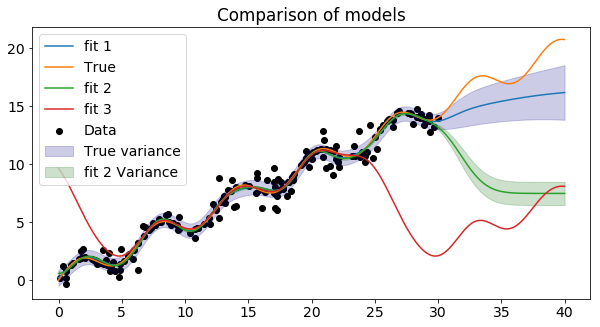

In [75]:

## Given functions
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared, RBF

# Replace `length_scale` and `periodicity` with the values found in the previous part.
kernel_simple = ExpSineSquared(length_scale=0.5, periodicity=25) # periodic component

k1 = 4300 * RBF(length_scale=70.0)  # long term smooth rising trend
k2 = 6 * RBF(length_scale=90.0) * ExpSineSquared(length_scale=1.3, periodicity=1.0)  # periodic component
k2 = 6 * RBF(length_scale=90.0) * ExpSineSquared(length_scale=0.5, periodicity=25)  # periodic component

k3 = 0.03 * RBF(length_scale=0.134) + WhiteKernel(noise_level=0.035)  # noise terms

k4=k1+k2+k3;

gpr = GaussianProcessRegressor(kernel=k4,normalize_y=True,alpha=1e-1)
gpr.fit(X, y)
y_gpr, y_std = gpr.predict(X_plot, return_std=True)


plt.figure(figsize=(10, 5));
plt.plot(X_plot, y_gpr, label='fit 1');
plt.scatter(X, y, c='k', label='Data');
plt.plot(X_plot, true_y, label='True');
plt.fill_between(X_plot[:, 0], y_gpr - y_std, y_gpr + y_std, color='darkblue',
                 alpha=0.2, label='True variance')


gpr = GaussianProcessRegressor(kernel=kernel_simple,normalize_y=True,alpha=1e-1)
gpr.fit(X, y)
y_gpr, y_std = gpr.predict(X_plot, return_std=True)

plt.plot(X_plot, y_gpr, label='fit 2');

plt.fill_between(X_plot[:, 0], y_gpr - y_std, y_gpr + y_std, color='darkgreen',
                 alpha=0.2, label='fit 2 Variance')


from sklearn.gaussian_process.kernels import WhiteKernel,ExpSineSquared
from sklearn.gaussian_process import GaussianProcessRegressor
clf = svm.SVR(kernel='precomputed');

gp_kernel = ExpSineSquared(0.5, 25);
gpr = svm.SVR(kernel=gp_kernel);
gpr.fit(X, y);
y_gpr = gpr.predict(X_plot);
plt.plot(X_plot, y_gpr, label='fit 3');

plt.title("Comparison of models")
plt.legend(loc='best')
plt.show()

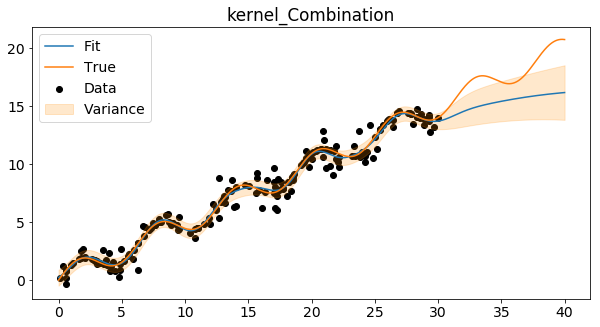

In [78]:
## Given functions
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared, RBF
from sklearn.gaussian_process import GaussianProcessRegressor

# Replace `length_scale` and `periodicity` with the values found in the previous part.
kernel_simple = ExpSineSquared(length_scale=0.5, periodicity=25) # periodic component

k1 = 4300 * RBF(length_scale=90.0)  # long term smooth rising trend
#k2 = 6 * RBF(length_scale=90.0) * ExpSineSquared(length_scale=1.3, periodicity=1.0)  # periodic component
k2 = 6 * RBF(length_scale=90.0) * ExpSineSquared(length_scale=0.5, periodicity=25)  # periodic component

k3 = 0.03 * RBF(length_scale=0.134) + WhiteKernel(noise_level=0.035)  # noise terms

k4=k1+k2+k3;

gpr = GaussianProcessRegressor(kernel=k4,normalize_y=True,alpha=1e-1)
gpr.fit(X, y)
y_gpr, y_std = gpr.predict(X_plot, return_std=True)


plt.figure(figsize=(10, 5));
plt.plot(X_plot, y_gpr, label='Fit');
plt.scatter(X, y, c='k', label='Data');
plt.plot(X_plot, true_y, label='True');
plt.fill_between(X_plot[:, 0], y_gpr - y_std, y_gpr + y_std, color='darkorange',
                 alpha=0.2, label= 'Variance')
plt.title('kernel_Combination');
plt.legend(loc='best')
plt.show()

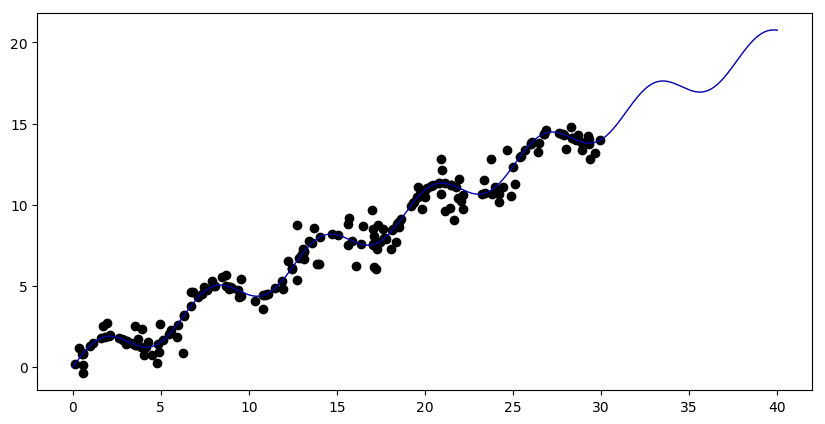

In [324]:
# Generate sample data with added trend
rng = np.random.RandomState(0)
X = 30 * rng.rand(200, 1)
y = X.ravel()/2 + np.sin(X).ravel()
y[::2] += rng.normal(scale = 1.0, size = X.shape[0] // 2)  # add noise

X_plot = np.linspace(0, 40, 10000)[:, None]
true_y = X_plot/2 + np.sin(X_plot)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, c='k', label='Data')
plt.plot(X_plot, true_y);

In [ ]:
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared, RBF

# Replace `length_scale` and `periodicity` with the values found in the previous part.
kernel_simple = ExpSineSquared(length_scale=1, periodicity=1) # periodic component

k1 = 4300 * RBF(length_scale=70.0)  # long term smooth rising trend
k2 = 6 * RBF(length_scale=90.0) * ExpSineSquared(length_scale=1.3, periodicity=1.0)  # periodic component
k3 = 0.03 * RBF(length_scale=0.134) + WhiteKernel(noise_level=0.035)  # noise terms

## Bayesian updates (3 points (2+1))

We consider real data about solar radiation measured by a weather balloon:
https://www.openml.org/d/512. We'll use only the raw data (at least the first 1000 points) and try to learn the (very noisy) trend. 

1. Train a Gaussian process on an increasing amount of samples of the training data. Use a simple RBF kernel:
`RBF(10, (1e-2, 1e2))`

 - Start with 10 _random_ samples and plot the predictions (both the mean and the uncertainty interval) for both training and test data, as shown in class. Also compute $R^2$ on the training data.
 - Repeat and 10 more points, retrain and redraw. Do this a couple of times and interpret/explain what you see. 
 
2. Train the Gaussian on the full training set.

 - Plot the predictions (including the uncertainty interval) on the full dataset. Evaluate on the test set using $R^2$ 
 - Interpret the results. Is the kernel right? Is the GP under/overfitting?
 - Try to improve the results by tuning the kernel. Do this either manually or using a small grid/random search.

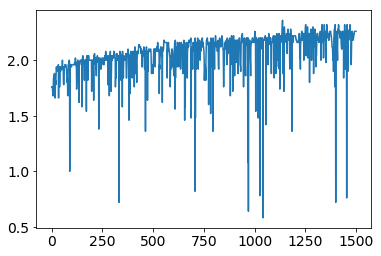

In [13]:
import matplotlib.pyplot as plt
import openml as oml
import pandas as pd
import numpy as np
# Get the data
balloon_data = oml.datasets.get_dataset(512) # Download Balloon data
X, y = balloon_data.get_data(target=balloon_data.default_target_attribute);

train = X[:1000]
test = X[1000:1500]
X_train = np.array(list(range(1000)))[np.newaxis].T
y_train = X[:1000].reshape(-1, 1)
X_test = np.array(list(range(1000,1500)))[np.newaxis].T
y_test = X[1000:1500].reshape(-1, 1)
X_all = np.array(list(range(1500)))[np.newaxis].T

pd.Series(X[:1500,0]).plot()
plt.show()

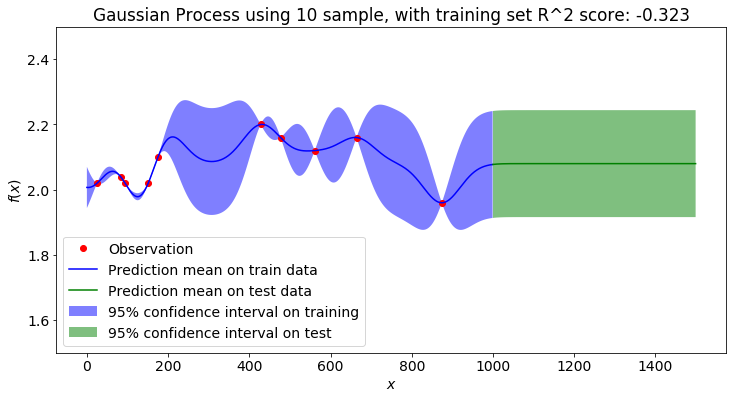

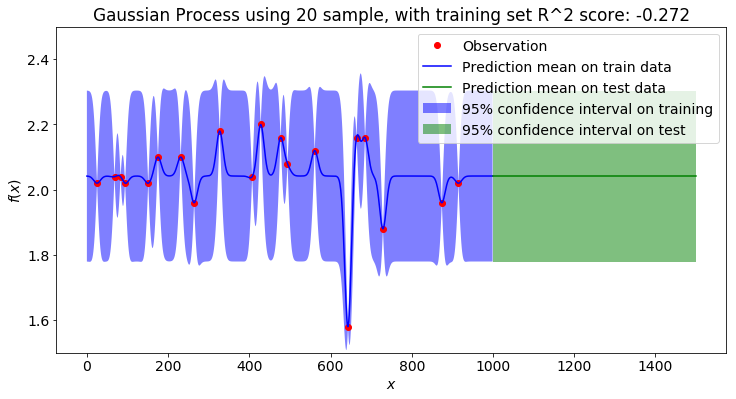

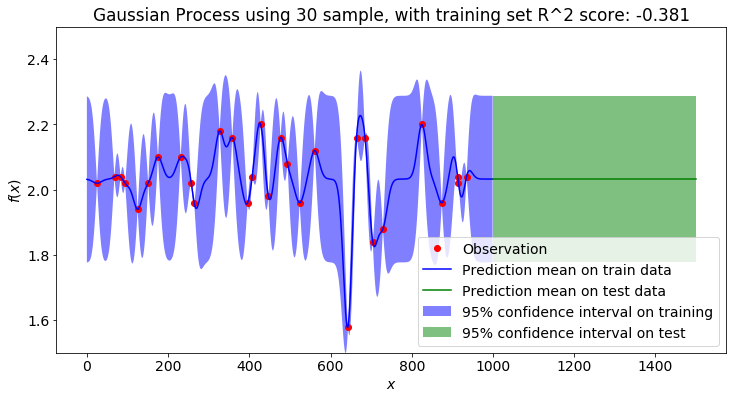

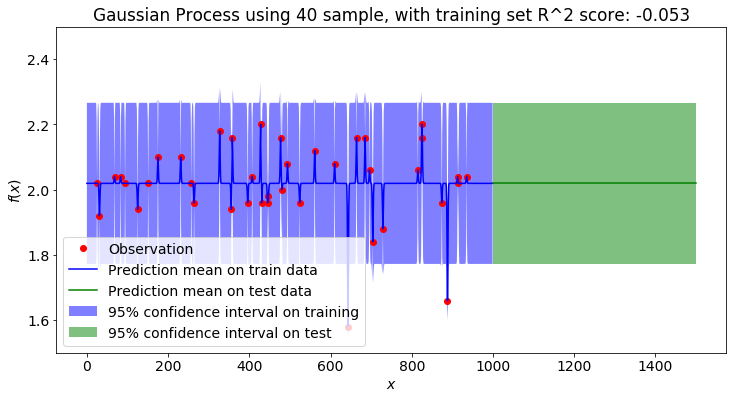

In [40]:
# Train a Gaussian process on an increasing amount of samples of the training data.
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process import GaussianProcessRegressor
import pods

X_sample =[]
y_sample =[]
# Take 1st 10 random samples
X_sample = X_train[np.random.choice(X_train.shape[0], size=10, replace=False), :]
y_sample = y_train[np.random.choice(y_train.shape[0], size=10, replace=False), :]

# Instantiate a Gaussian Process model with scikit
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=9, normalize_y=True)
    
for x in range(1, 5):       
#     print(type(X_sample),X_sample.shape)
#     print(X_sample.T)
#     print(type(y_sample),y_sample.shape)
#     print(y_sample.T)
    
    # Fit to data using Maximum Likelihood Estimation of the parameters
    gp.fit(X_sample, y_sample)
    
    # Make the prediction on the meshed x-axis (ask for MSE as well)
    y_pred_train, sigma_train = gp.predict(X_train, return_std=True)
    y_pred_train = y_pred_train[:,0]
    y_pred_test, sigma_test = gp.predict(X_test, return_std=True)
    y_pred_test = y_pred_test[:,0]
    
    # R-square on the training data
#     print("Training set R^2 score: {:.3f}".format(gp.score(X_train, y_train)))
    
#     print(type(X_sample_add),X_sample_add.shape)
#     print(X_sampleadd.T)
#     print(type(y_sample_add),y_sample_add.shape)
#     print(y_sampleadd.T)
#     print('')
    
    # Plot the function, the prediction and the 95% confidence interval based on
    fig = plt.figure(figsize = (12,6))
    plt.rcParams.update({'font.size': 14})
    _= plt.plot(X_sample, y_sample, 'r.', markersize=12, label='Observation')
    _= plt.plot(X_train, y_pred_train, 'b-', markersize=10, label='Prediction mean on train data')
    _= plt.plot(X_test, y_pred_test, 'g-', markersize=10, label='Prediction mean on test data')
    _= plt.fill(np.concatenate([X_train, X_train[::-1]]),
                 np.concatenate([y_pred_train - 1.9600 * sigma_train,
                                 (y_pred_train + 1.9600 * sigma_train)[::-1]]),
                 alpha=.5, fc='b', ec='None', label='95% confidence interval on training')
    _= plt.fill(np.concatenate([X_test, X_test[::-1]]),
                 np.concatenate([y_pred_test - 1.9600 * sigma_test,
                                 (y_pred_test + 1.9600 * sigma_test)[::-1]]),
                 alpha=.5, fc='g', ec='None', label='95% confidence interval on test')
    _= plt.title('Gaussian Process using '+str(x*10)+' sample, with training set R^2 score: {:.3f}'.format(gp.score(X_train, y_train)))
    _= plt.xlabel('$x$')
    _= plt.ylabel('$f(x)$')
    _= plt.ylim(1.5,2.5)
    _= plt.legend(loc='best')
    _= plt.show()
    
    # Take additional 10 random samples for next iteration
    X_sample_add = X_train[np.random.choice(X_train.shape[0], size=10, replace=False), :]
    y_sample_add = y_train[np.random.choice(y_train.shape[0], size=10, replace=False), :]
    X_sample= np.append(X_sample,X_sample_add, axis=0)
    y_sample= np.append(y_sample,y_sample_add, axis=0)


**Q:**  interpret/explain what you see<br>**A:** For the first picture we use 10 of random samples and then gradualy increase 10 samples for the next three training. It can bee sen that the smaller the gap between two observations the smaller the uncertainty will be, while the farther the distance between two observations the bigger the uncertainty will be.

Training set R^2 score: -0.638


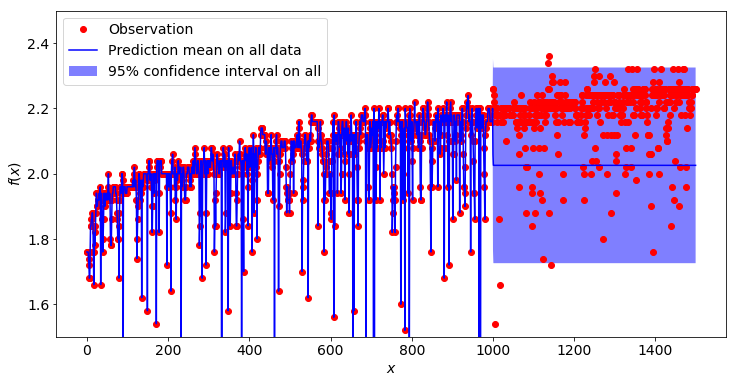

In [24]:
#Train the Gaussian on the full training set
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process import GaussianProcessRegressor
import pods

# Instantiate a Gaussian Process model with scikit
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=99, normalize_y=True)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)

# predict on all data
y_pred, sigma = gp.predict(X_all, return_std=True)
y_pred= y_pred[:,0]

# R-square on the training data
print("Training set R^2 score: {:.3f}".format(gp.score(X_test, y_test)))

# Plot the function, the prediction and the 95% confidence interval based on
fig = plt.figure(figsize = (12,6))
plt.rcParams.update({'font.size': 14})
_ = plt.plot(X_train, y_train, 'r.', markersize=12, label='Observation')
_ = plt.plot(X_test, y_test, 'r.', markersize=12)
_ = plt.plot(X_all, y_pred, 'b-', markersize=10, label='Prediction mean on all data')
_ = plt.fill(np.concatenate([X_all, X_all[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma, (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval on all')
_ = plt.xlabel('$x$')
_ = plt.ylabel('$f(x)$')
_ = plt.ylim(1.5,2.5)
_ = plt.legend(loc='best')
_ = plt.show()

In [41]:
#Optimize the hyperparameter for train the Gaussian on the full training set
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process import GaussianProcessRegressor
import numpy as np
import pods

rscore=[]
# clock=1
for alpha in np.linspace(1e-15, 1e-1, num=30):
    # Instantiate a Gaussian Process model with scikit
    kernel= C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
    gp= GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=9, normalize_y=True, alpha=alpha)
    
    # Fit to data using Maximum Likelihood Estimation of the parameters
    gp.fit(X_train, y_train)
    
    # predict on all data
    y_pred, sigma = gp.predict(X_all, return_std=True)
    y_pred= y_pred[:,0]
    
    # R-square on the training data
    rs=gp.score(X_test, y_test)
    rscore.append(rs)
    score = gp.score(X_test, y_test)
#     print('iteration number %s is done' % clock)
    print("Using Alpha: {:.2e}, the R^2 score: {:f}".format(alpha, score))
    clock= clock+1


Using Alpha: 1.00e-15, the R^2 score: -0.638444
Using Alpha: 3.45e-03, the R^2 score: -0.638424
Using Alpha: 6.90e-03, the R^2 score: -0.638380
Using Alpha: 1.03e-02, the R^2 score: -0.633815
Using Alpha: 1.38e-02, the R^2 score: -0.533181
Using Alpha: 1.72e-02, the R^2 score: -0.545433
Using Alpha: 2.07e-02, the R^2 score: -0.553756
Using Alpha: 2.41e-02, the R^2 score: -0.559828
Using Alpha: 2.76e-02, the R^2 score: -0.564485
Using Alpha: 3.10e-02, the R^2 score: -0.568188
Using Alpha: 3.45e-02, the R^2 score: -0.571218
Using Alpha: 3.79e-02, the R^2 score: -0.573753
Using Alpha: 4.14e-02, the R^2 score: -0.575914
Using Alpha: 4.48e-02, the R^2 score: -0.577783
Using Alpha: 4.83e-02, the R^2 score: -0.579423
Using Alpha: 5.17e-02, the R^2 score: -0.580877
Using Alpha: 5.52e-02, the R^2 score: -0.582179
Using Alpha: 5.86e-02, the R^2 score: -0.583355
Using Alpha: 6.21e-02, the R^2 score: -0.584426
Using Alpha: 6.55e-02, the R^2 score: -0.585407
Using Alpha: 6.90e-02, the R^2 score: -0

**Q :** Interpret the results. Is the kernel right? Is the GP under/overfitting?<br>**A :** In this training we are trying to tune the hyper parameter alpha (as alpha is the one responsible as regularization parameter) but then after using several alpha, there are only insignificant change on $R^2$ score. While $R^2$ is able to become a negative value without violating any rules of math and happened when the chosen model does not follow the trend of the data (fits the data really poorly) in this training, the alpha parameter seems to be unable to handle the noise that was in the data.
Using bigger alpha will result in underfitting, and make it smaller will resulting in overfitting.

## A data mining challenge (4 points)

The goal here is to use everything you have learned to build the best model for a given classification task. We will use two tasks hosted on OpenML, so you will all receive the same cross-validation splits, and your model will be evaluated on the server. The goal is to reasonably select algorithms and hyperparameter settings to obtain the best model. You can also do model selection, pipeline building, and parameter optimization as you have done before. Skeleton code is provided in the OpenML tutorial. You need to optimize the AUROC score (calculated using 10-fold cross0-validation).

- Challenge 1: Detects accents in speech data.

    - The OpenML Task ID is 167132: https://www.openml.org/t/167132
    - The dataset description can be found here: https://www.openml.org/d/40910
    - Leaderboard: https://www.openml.org/t/167132#!people
    
- Challenge 2: Image recognition (CIFAR-10 subsample).

    - The OpenML Task ID is 167133: https://www.openml.org/t/167133
    - The dataset description can be found here: https://www.openml.org/d/40926
    - Leaderboard: https://www.openml.org/t/167133#!people
    - Note that this is a high-dimensional dataset (and not so small). Think carefully about how to run experiments in the  time available.
    
- You are able to see the solutions of others (by clicking in the timeline or run list), so you can learn from prior experiments (what seems to work, how long does it take to train certain models, ...). Resubmission of the exact same solution is not possible.
- You can share one account (one API key) per team. In case you use two, we take the one that performs best.
- Document the different experiments that you ran in this notebook (running them can of course be done outside of the notebook). For each experiment, provide a description of how and why you chose the algorithms and parameters that you submitted. Reason about which experiments to try, don't just do an immense random search.
- Points are rewarded as follows (independently for each task):

    - 1 point for the breadth of experiments you ran (algorithms, pipelines, hyperparameter settings)
    - 1 point for reasoning/insight and interpretation of the results
    - 1 (bonus) point for every team who has uploaded the best solution thus far **on AUC** (who reaches the top of the leaderboard at any moment during the assignment)
        - Exception: simply repeating top models with nearly identical hyperparameters. This will be checked on the timeline.
        - Note: On the leaderboard page, the 'frontier' line is drawn, and your top ranking is also shown in the leaderboard.
        
Note: Report the AUC scores of your best models in your report as well. In case of issues with OpenML we will use the experiments and scores mentioned your report.

** Note:** 
We did the challange on separate file. the file also attached
